# Titanic Survival Prediction

In [285]:
import pandas as pd
import numpy as np
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt

In [286]:
df  = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### 🧾 Titanic Dataset Features and Their Meanings

| Feature   | Description                                         | Notes                                       |
|-----------|-----------------------------------------------------|---------------------------------------------|
| `survival` | Survival                                            | 0 = No, 1 = Yes                              |
| `pclass`   | Ticket class                                        | 1 = 1st, 2 = 2nd, 3 = 3rd                    |
| `sex`      | Sex                                                 | Male or Female                              |
| `Age`      | Age in years                                        | May contain missing values                  |
| `sibsp`    | # of siblings/spouses aboard the Titanic            | Sibling = brother, sister, step-sibling     |
| `parch`    | # of parents/children aboard the Titanic            | Child = son, daughter, step-child           |
| `ticket`   | Ticket number                                       | Alphanumeric, may not indicate much alone   |
| `fare`     | Passenger fare                                      | Amount paid for the ticket                  |
| `cabin`    | Cabin number                                        | Many missing values                         |
| `embarked` | Port of Embarkation                                 | C = Cherbourg, Q = Queenstown, S = Southampton |


In [287]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [288]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

since the above resulst shows missing values in age , cabin and embarked we need to handle them 

# Feature Engineering 

In [289]:
df = df.drop(columns=['Ticket', 'PassengerId' , 'Name' , 'Cabin' , ], axis=1) # dropping unnecessary columns

In [290]:
df['Age'] = df['Age'].fillna(df['Age'].median()) # handling missing age values
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0]) # handling missing embarked values

<Axes: xlabel='Sex', ylabel='Survived'>

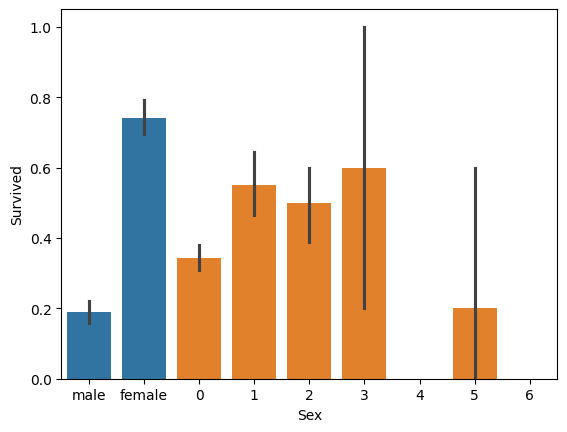

In [291]:
sns.barplot(x='Sex', y='Survived', data=df) 
sns.barplot(x='Parch', y='Survived', data=df) 


In [292]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [293]:
# one hot encoding embarked , sex and Pclass columns since they are categorical variables
df = pd.get_dummies(df, columns=['Embarked' , 'Sex' , 'Pclass'] , drop_first=True)


In [294]:
df

,Survived,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,False,True,True,False,True
1,1,38.0,1,0,71.2833,False,False,False,False,False
2,1,26.0,0,0,7.9250,False,True,False,False,True
3,1,35.0,1,0,53.1000,False,True,False,False,False
4,0,35.0,0,0,8.0500,False,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,13.0000,False,True,True,True,False
887,1,19.0,0,0,30.0000,False,True,False,False,False
888,0,28.0,1,2,23.4500,False,True,False,False,True
889,1,26.0,0,0,30.0000,False,False,True,False,False


In [295]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Survived'], axis=1)  # Features
Y = df['Survived']  # Target variable
x_train , x_test , y_train , y_test = train_test_split(X, Y , test_size=0.2, random_state=42)

In [296]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


# Logistic Regression

In [297]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7988826815642458
Confusion Matrix:
 [[90 15]
 [21 53]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



# Random Forest

In [298]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
rf_y_pred = rf_model.predict(x_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_y_pred)) 
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Random Forest Accuracy: 0.8212290502793296
Confusion Matrix:
 [[90 15]
 [21 53]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



# Support Vector Machine

In [299]:
# using Support Vector Machine
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(x_train, y_train)
svm_y_pred = svm_model.predict(x_test)
print("SVM Accuracy:", accuracy_score(y_test, svm_y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, svm_y_pred))
print("Classification Report:\n", classification_report(y_test, svm_y_pred))

SVM Accuracy: 0.8212290502793296
Confusion Matrix:
 [[96  9]
 [23 51]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.91      0.86       105
           1       0.85      0.69      0.76        74

    accuracy                           0.82       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179



In [300]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
bagging_model = BaggingClassifier(estimator=RandomForestClassifier(n_estimators=100, random_state=42), n_estimators=10, random_state=42)
bagging_model.fit(x_train, y_train)
bagging_y_pred = bagging_model.predict(x_test)
print("Bagging Classifier Accuracy:", accuracy_score(y_test, bagging_y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, bagging_y_pred))
print("Classification Report:\n", classification_report(y_test, bagging_y_pred))



Bagging Classifier Accuracy: 0.8156424581005587
Confusion Matrix:
 [[93 12]
 [21 53]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.89      0.85       105
           1       0.82      0.72      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



In [ ]:
from sklearn.ensemble import StackingClassifier
estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('svm', SVC(kernel='rbf', probability=True, random_state=42)),
]
stacking_model = StackingClassifier(estimators=estimators , final_estimator=LogisticRegression())
stacking_model.fit(x_train, y_train)
stacking_y_pred = stacking_model.predict(x_test)
print("Stacking Classifier Accuracy:", accuracy_score(y_test, stacking_y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, stacking_y_pred))
print("Classification Report:\n", classification_report(y_test, stacking_y_pred))

Stacking Classifier Accuracy: 0.8324022346368715
Confusion Matrix:
 [[96  9]
 [21 53]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86       105
           1       0.85      0.72      0.78        74

    accuracy                           0.83       179
   macro avg       0.84      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179

<class 'numpy.ndarray'>


In [308]:
# saveing the stacking model
import joblib
joblib.dump(stacking_model, 'titanic_stacking_model.pkl')

['titanic_stacking_model.pkl']

# Testing on Unseen Data

In [320]:
test_df = pd.read_csv('test.csv')
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [321]:
test_df = test_df.drop(columns=['Ticket', 'PassengerId' , 'Name' , 'Cabin' ], axis=1) # dropping unnecessary columns
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].median()) # handling missing age values
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].median()) # handling missing fare values
test_df = pd.get_dummies(test_df, columns=['Embarked' , 'Sex', 'Pclass'] , drop_first=True) # one hot encoding

In [322]:
saved_model = joblib.load('titanic_stacking_model.pkl')

In [323]:
saved_model_predictions = saved_model.predict(test_df)
print("Saved Model Predictions:", saved_model_predictions)
print()

Saved Model Predictions: [1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0 1 0 1 1 1 0 0 0 0 1 1 1
 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1
 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0
 1 1 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 1 0 0 1 0 1 1
 1 0 0 1 1 0 0 1 1 1 1 0 1 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0 1 0 0 0 0 1 1 0
 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 1 1 0 1 1 1 1 0 0 0 1 1 0 0 1 0 1
 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 0
 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1
 0 1 1 1 1 0 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 0 0 0 1 1
 0 1 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1 0 1 1 0 0
 0 1 0 0 0 1 1 0 1 0 1 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1 1 1 0 0 1 1 0 0
 0 1 0 1 1 1 1 1 1 1 0]



c:\Users\25194\Desktop\titanic_survival_simulator\.venv\lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\25194\Desktop\titanic_survival_simulator\.venv\lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [324]:
# saving to csv file 
raw_test_df = pd.read_csv("test.csv")
passenger_ids = raw_test_df["PassengerId"]

# Now create the submission DataFrame
submission_df = pd.DataFrame({
    "PassengerId": passenger_ids,
    "Survived": saved_model_predictions.astype(int)  # ensure no boolean values
})

# Save to CSV
submission_df.to_csv("submission.csv", index=False)
